In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('processed_melbourne_housing.csv')

print(df.head())

# 2. Define Features and Target
X = df.drop('Price', axis=1)
y = df['Price']

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate
predictions = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))

   Rooms  Type      Price  Method  Distance  Bathroom  Car  Landsize  \
0      2     0  1480000.0       1       2.5       1.0  1.0     202.0   
1      2     0  1035000.0       1       2.5       1.0  0.0     156.0   
2      3     0  1465000.0       3       2.5       2.0  0.0     134.0   
3      3     0   850000.0       0       2.5       2.0  1.0      94.0   
4      4     0  1600000.0       4       2.5       1.0  2.0     120.0   

   BuildingArea  CouncilArea  Regionname  Propertycount  Suburb_Encoded  \
0         126.0           31           2         4019.0    1.060366e+06   
1          79.0           31           2         4019.0    1.060366e+06   
2         150.0           31           2         4019.0    1.060366e+06   
3         126.0           31           2         4019.0    1.060366e+06   
4         142.0           31           2         4019.0    1.060366e+06   

   SellerG_Encoded  
0     1.018522e+06  
1     1.018522e+06  
2     1.018522e+06  
3     1.018522e+06  
4     1.014

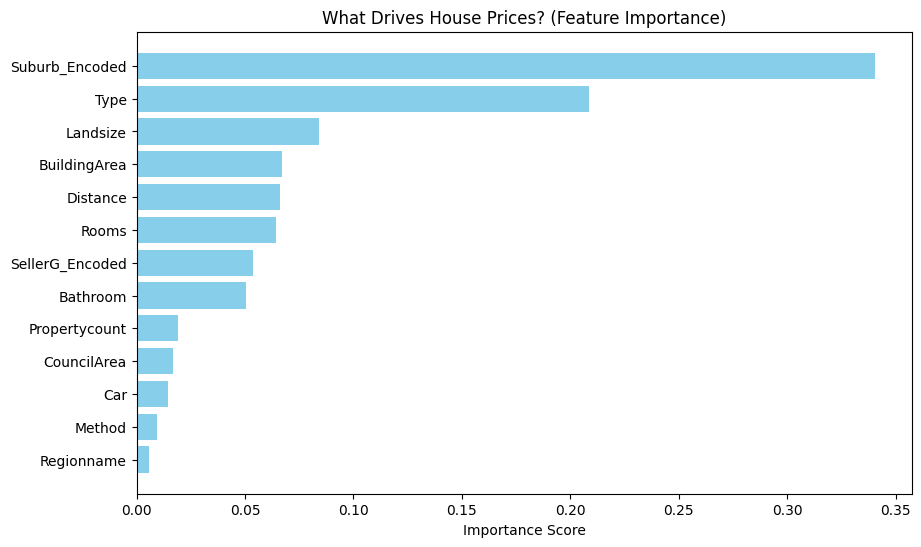

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame to view them clearly
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() # Put the most important feature at the top
plt.title("What Drives House Prices? (Feature Importance)")
plt.xlabel("Importance Score")
plt.show()

In [3]:
from sklearn.model_selection import cross_val_score

# 1. Initialize the model (same as before)
model_cv = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Run 5-Fold Cross-Validation
# cv=5 means "split into 5 parts"
# scoring='neg_mean_absolute_error' is standard because sklearn tries to "maximize" scores
# so it makes errors negative. We multiply by -1 to fix it.
mae_scores = -1 * cross_val_score(model_cv, X, y, cv=5, scoring='neg_mean_absolute_error')

print("MAE Scores for each fold:", mae_scores)
print(f"Average MAE: ${mae_scores.mean():,.2f}")

MAE Scores for each fold: [216554.20020462 191903.16695617 187889.34213111 149722.67555035
 158229.15637971]
Average MAE: $180,859.71


In [4]:
from sklearn.model_selection import GridSearchCV

# 1. Define the model
rf = RandomForestRegressor(random_state=42)

# 2. Define the "Grid" of settings to test
# We will test 2 x 3 = 6 different combinations
param_grid = {
    'n_estimators': [100, 200],       # Try 100 trees and 200 trees
    'max_depth': [10, 20, None],      # Try limiting depth to prevent overfitting
    'min_samples_split': [2, 5]       # Try requiring more samples to split a node
}

# 3. Setup the Grid Search
# n_jobs=-1 means "use all computer processors" to speed it up
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error',
                           n_jobs=-1, verbose=2)

# 4. Train! (This might take a minute or two)
print("Starting Grid Search...")
grid_search.fit(X, y)

# 5. Get the Winner
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score (MAE): ${-grid_search.best_score_:,.2f}")

Starting Grid Search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   7.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   7.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, m

In [7]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score


xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=42)

# 2. Run 5-Fold Cross-Validation
print("Training XGBoost...")
xgb_scores = -1 * cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')

print("--------------------------------------")
print(f"Random Forest Best MAE: $180,214")
print(f"XGBoost Average MAE:    ${xgb_scores.mean():,.2f}")
print("--------------------------------------")

Training XGBoost...
--------------------------------------
Random Forest Best MAE: $180,214
XGBoost Average MAE:    $174,860.79
--------------------------------------


In [8]:
# 1. Remove the top 1% (Luxury) and bottom 1% (Cheap)
q_low = df['Price'].quantile(0.01)
q_high = df['Price'].quantile(0.99)

# Filter the data
df_filtered = df[(df['Price'] > q_low) & (df['Price'] < q_high)]

print(f"Removed {len(df) - len(df_filtered)} outlier rows.")

# 2. Retest XGBoost on this clean data
X_clean = df_filtered.drop('Price', axis=1)
y_clean = df_filtered['Price']

clean_scores = -1 * cross_val_score(xgb_model, X_clean, y_clean, cv=5, scoring='neg_mean_absolute_error')

print("--------------------------------------")
print(f"XGBoost (Original):   $174,860")
print(f"XGBoost (Filtered):   ${clean_scores.meaxn():,.2f}")
print("--------------------------------------")

Removed 287 outlier rows.
--------------------------------------
XGBoost (Original):   $174,860
XGBoost (Filtered):   $162,068.01
--------------------------------------


Success! Model saved as 'melbourne_housing_xgboost.pkl'


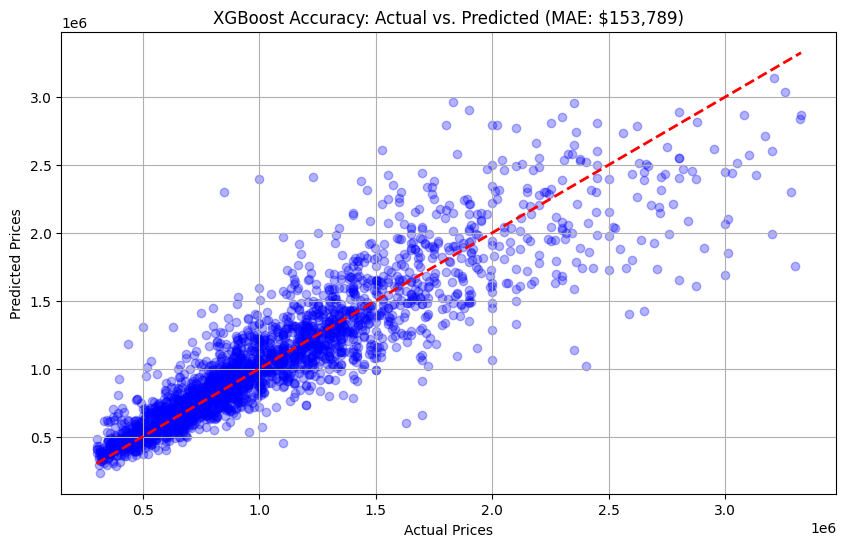

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
# 1. Split the CLEAN data (80/20)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# 2. Fit the XGBoost model on the clean training data
xgb_model.fit(X_train_clean, y_train_clean)
joblib.dump(xgb_model, 'melbourne_housing_xgboost.pkl')

print("Success! Model saved as 'melbourne_housing_xgboost.pkl'")

# 3. Make predictions
clean_preds = xgb_model.predict(X_test_clean)

# 4. Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, clean_preds, alpha=0.3, color='blue')

# Add a red line for "Perfect Prediction"
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()], 'r--', lw=2)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'XGBoost Accuracy: Actual vs. Predicted (MAE: ${mean_absolute_error(y_test_clean, clean_preds):,.0f})')
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
r2 = r2_score(y_test_clean, clean_preds)

mape = mean_absolute_percentage_error(y_test_clean, clean_preds)

accuracy = 100 - (mape * 100)

print("--------------------------------------")
print(f"Model Performance on Clean Data:")
print(f"R² Score:            {r2:.4f}  (Explains {r2*100:.1f}% of price variance)")
print(f"Mean Percentage Error: {mape*100:.2f}%")
print(f"Approximate Accuracy:  {accuracy:.2f}%")
print("--------------------------------------")

--------------------------------------
Model Performance on Clean Data:
R² Score:            0.8052  (Explains 80.5% of price variance)
Mean Percentage Error: 14.43%
Approximate Accuracy:  85.57%
--------------------------------------


In [15]:
# 1. Load the model from the file
loaded_model = joblib.load('melbourne_housing_xgboost.pkl')

# Create a small table comparing Actual vs Predicted for the first 5 houses
results = pd.DataFrame({
    'Actual': y_clean.iloc[:5].values,
    'Predicted': loaded_model.predict(X_clean.iloc[:5]),
})

# Calculate the difference
results['Difference'] = results['Predicted'] - results['Actual']
results['% Error'] = (results['Difference'] / results['Actual']) * 100

# Format it nicely
pd.options.display.float_format = '${:,.0f}'.format
print(results)

      Actual  Predicted  Difference  % Error
0 $1,480,000 $1,178,632   $-301,368     $-20
1 $1,035,000 $1,014,486    $-20,514      $-2
2 $1,465,000 $1,372,417    $-92,583      $-6
3   $850,000 $1,084,035    $234,035      $28
4 $1,600,000 $1,519,205    $-80,795      $-5
